<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

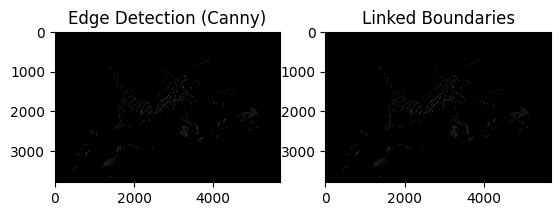

Chain Code of First Boundary: [6, 0, 6, 0, 6, 0, 0, 0, 6, 0, 6, 0, 0, 6, 0, 6, 0, 6, 0]
Fourier Descriptors (First 5): [ 2.40060000e+04+1.01150000e+04j -4.94884688e+01+1.76594087e+01j
 -2.88741702e+01+5.63292943e+00j -1.93939240e+01+1.69192884e+00j
 -1.25055935e+01-4.64930629e+00j]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Load and preprocess the input image (Edge detection using Canny)
image = cv2.imread('/content/Butterfly-image.jpg', 0)
edges = cv2.Canny(image, 100, 200)  # Perform edge detection

# Pseudocode function: Boundary Linking
def boundary_linking(edge_image):
    boundaries = []
    visited = np.zeros(edge_image.shape, dtype=bool)
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    def is_valid(x, y):
        # Check if pixel is valid and is an edge pixel (white) and not visited
        return 0 <= x < edge_image.shape[1] and 0 <= y < edge_image.shape[0] and edge_image[y, x] == 255 and not visited[y, x]

    def follow_edge(x, y):
        # Follow the edge pixels to form a continuous boundary
        boundary = [(x, y)]
        visited[y, x] = True
        stack = [(x, y)]

        while stack:
            cx, cy = stack.pop()
            for dx, dy in neighbors:
                nx, ny = cx + dx, cy + dy
                if is_valid(nx, ny):
                    visited[ny, nx] = True
                    boundary.append((nx, ny))
                    stack.append((nx, ny))
        return boundary

    # Iterate over the edge image
    for y in range(edge_image.shape[0]):
        for x in range(edge_image.shape[1]):
            if edge_image[y, x] == 255 and not visited[y, x]:
                boundary = follow_edge(x, y)
                if len(boundary) > 10:  # Filter small noisy boundaries
                    boundaries.append(boundary)
    return boundaries

# Boundary Representation using Chain Codes
def chain_code(boundary):
    chain = []
    directions = [(0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1)]

    for i in range(1, len(boundary)):
        (x1, y1) = boundary[i - 1]
        (x2, y2) = boundary[i]
        direction = (x2 - x1, y2 - y1)

        if direction in directions:
            chain.append(directions.index(direction))
    return chain

# Boundary Description using Fourier Descriptors
def fourier_descriptors(boundary):
    boundary_complex = [complex(p[0], p[1]) for p in boundary]
    descriptors = fft(boundary_complex)
    return descriptors

# Apply the boundary linking
boundaries = boundary_linking(edges)

# Plot the edge image and the boundaries
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')

# Visualizing the linked boundaries
boundary_image = np.zeros_like(edges)
for boundary in boundaries:
    for point in boundary:
        boundary_image[point[1], point[0]] = 255

plt.subplot(1, 2, 2)
plt.imshow(boundary_image, cmap='gray')
plt.title('Linked Boundaries')
plt.show()

# Apply chain codes and Fourier descriptors on first detected boundary
if boundaries:
    boundary = boundaries[0]
    chain = chain_code(boundary)
    fourier_desc = fourier_descriptors(boundary)

    print("Chain Code of First Boundary:", chain)
    print("Fourier Descriptors (First 5):", fourier_desc[:5])